In [23]:

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import random

In [24]:
# read pd
df = pd.read_csv('MN_selected.csv')
df

,id,AssessTot,BldgArea,LotFront,YearBuilt,CommFAR,MedIncome,IfAlter,Central Harlem,Chelsea & Clinton,...,LandUse_9,LandUse_10,OwnerType_C,OwnerType_M,OwnerType_O,OwnerType_P,OwnerType_X,Zone,LandUse,OwnerType
0,0,156510900,2725731,0.00,1900,0.0,119691,0,0,0,...,0,0,0,0,0,1,0,L Manhattan,8,P
1,1,12197250,541886,500.00,1900,0.0,119691,0,0,0,...,0,0,0,0,0,0,1,L Manhattan,8,X
2,6,25390080,158197,311.00,1900,3.4,119691,1,0,0,...,0,0,1,0,0,0,0,L Manhattan,7,C
3,8,17134650,24346,793.67,1987,3.4,119691,0,0,0,...,0,0,1,0,0,0,0,L Manhattan,7,C
4,9,129665250,945425,323.00,1951,0.0,119691,0,0,0,...,1,0,1,0,0,0,0,L Manhattan,9,C
5,19,327600,4104,19.00,1920,15.0,119691,0,0,0,...,0,0,0,0,0,1,0,L Manhattan,4,P
6,22,943650,7475,36.17,1935,15.0,119691,0,0,0,...,0,0,0,0,0,1,0,L Manhattan,4,P
7,26,535090,7485,28.42,1900,15.0,119691,0,0,0,...,0,0,0,0,0,1,0,L Manhattan,4,P
8,29,6046650,46724,78.92,1950,15.0,119691,1,0,0,...,0,0,0,0,0,1,0,L Manhattan,5,P
9,33,138236850,845018,211.33,1970,15.0,119691,1,0,0,...,0,0,0,0,0,1,0,L Manhattan,5,P


In [25]:
# convert to np
data = df.as_matrix()

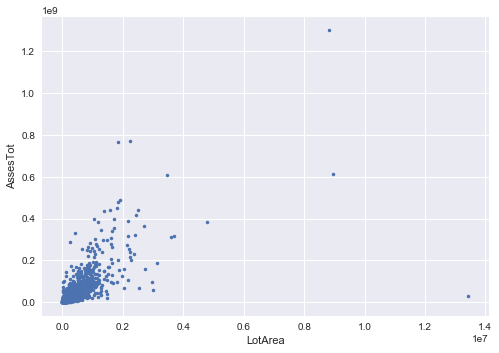

In [26]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('LotArea')
plt.ylabel('AssesTot')
plt.show()

In [27]:
# log scale AssessTot
data[:,1] = np.log(1.0*np.hstack(data[:,1]))

In [15]:
data[:,1] 

array([18.868636214081434, 16.316721074458805, 17.04986910452269, ...,
       10.268547246009254, 11.700798251802508, 14.344873302728676], dtype=object)

In [28]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 10)
    upper_bound = quartile_3 + (iqr * 10)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [29]:
# remove outliers
index = np.zeros(len(data))
for i in range(1,7):
    index[outliers_iqr(data[:,i])] = 1
data = data[np.where(index==0)]

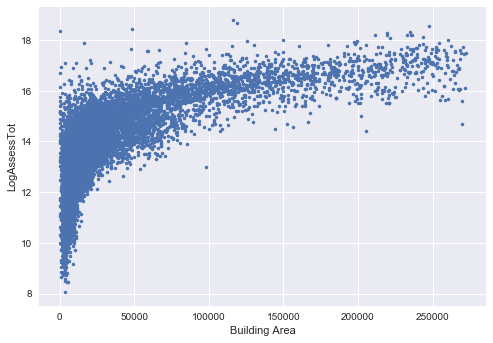

In [30]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('Building Area')
plt.ylabel('LogAssessTot')
plt.show()

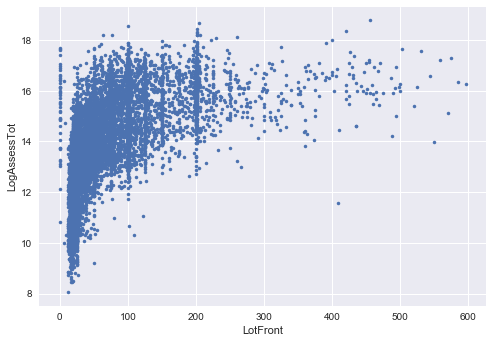

In [31]:
# plotting
plt.plot(data[:,3],data[:,1],'.')
plt.xlabel('LotFront')
plt.ylabel('LogAssessTot')
plt.show()

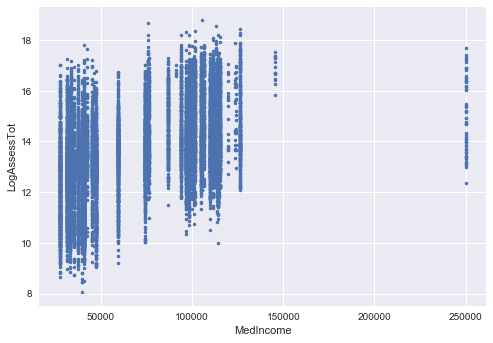

In [32]:
# plotting
plt.plot(data[:,6],data[:,1],'.')
plt.xlabel('MedIncome')
plt.ylabel('LogAssessTot')
plt.show()

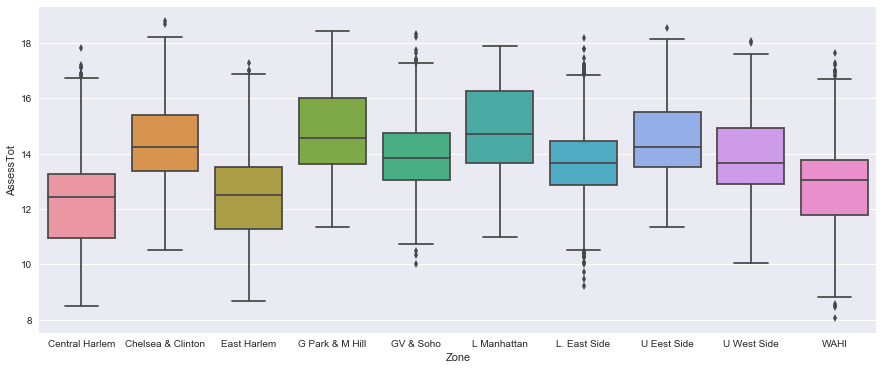

In [33]:
import seaborn as sns
# sns.set(style="ticks")
plt.figure(figsize=(15,6))
plt.xlabel('Zone')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8,order=[u'Central Harlem', u'Chelsea & Clinton', u'East Harlem', u'G Park & M Hill', u'GV & Soho', u'L Manhattan',u'L. East Side', u'U Eest Side', u'U West Side', u'WAHI'])
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8)
plt.show()

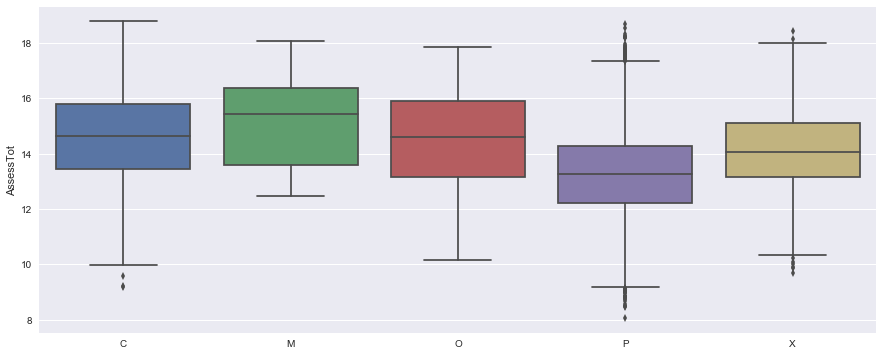

In [35]:
import seaborn as sns
# sns.set(style="ticks")
plt.figure(figsize=(15,6))
plt.xlabel('')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,35]),width=0.8,order=[u'C', u'M', u'O', u'P', u'X'])
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8)
plt.show()